# Importing Dataset¶

In [144]:
import pandas as pd
import numpy as np
df = pd.DataFrame(pd.read_excel("Carprediction.xlsx"))
df

,location,title,details,price(rs),emi/month
0,Delhi,2012 Maruti Swift\n,VDI Manual,314499,6996
1,Delhi,2014 Toyota Innova\n,2.5 GX 7 STR BS IV Manual,708499,15760
2,Delhi,2017 Toyota Innova Crysta\n\n,Touring Sport Diesel AT Automatic,1500699,33382
3,Delhi,2015 Hyundai Creta\n\n,1.6 S Manual,802599,17853
4,Delhi,2011 Hyundai i20\n,SPORTZ 1.2 O Manual,345299,7681
...,...,...,...,...,...
509,Nasik,2017 Hyundai Verna,1.6 SX VTVT Manual,641599,14272
510,Nasik,2013 Hyundai i20,MAGNA O 1.2 Manual,355199,7901
511,Nasik,2016 Maruti Baleno,ZETA 1.2 K12 Manual,570299,12686
512,Nasik,2013 Ford Ecosport,1.0 ECOBOOST TITANIUM OPT Manual,414599,9223


we have total 514 rows and 5 columns target columns is price(rs)

# Checking Null Value¶

In [85]:
df.isnull().sum()

location     0
title        0
details      0
price(rs)    0
emi/month    0
dtype: int64

no null value present on data set we can go ahed

# Checking Datatypes

In [3]:
df.dtypes

location     object
title        object
details      object
price(rs)     int64
emi/month     int64
dtype: object

as per this we can observed the terget columns price(rs) is int data types

# Making DataFrame for the Nominal Data

In [4]:
df_visualization_nominal=df[['location','title','details','price(rs)','emi/month']].copy()

In [5]:
df_visualization_nominal.columns

Index(['location', 'title', 'details', 'price(rs)', 'emi/month'], dtype='object')

# Visualization of the Data:¶

Delhi         40
Gurgaon       20
Lucknow       20
Jaipur        20
Indore        20
Pune          20
Faridabad     20
Chennai       20
Kolkata       20
Chandigarh    20
Bangalore     20
Nasik         20
Ghaziabad     20
Noida         20
Hyderbad      20
Panipat       20
Rajkot        20
Vadodara      20
Ludhiana      20
Mumbai        20
Meerut        20
Patna         20
Cochin        20
Mysore        19
Bhopal        15
Name: location, dtype: int64


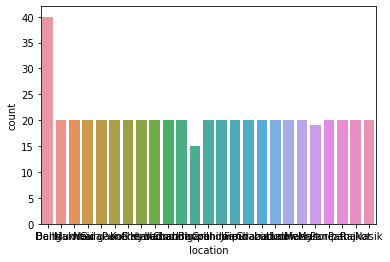

In [6]:
import seaborn as sns
ax = sns.countplot(x="location", data=df_visualization_nominal)
print(df_visualization_nominal["location"].value_counts())

we have total 25 location and maximum data is in Delhi

2016 Maruti Vitara Brezza        16
2018 Maruti Vitara Brezza        13
2016 Hyundai Creta               13
2015 Hyundai Creta               10
2017 Maruti Swift                10
                                 ..
2016 Hyundai Creta\n              1
2016 Hyundai Tucson New           1
2017 Hyundai New Elantra          1
2017 Toyota Innova Crysta\n\n     1
2020 Hyundai AURA                 1
Name: title, Length: 215, dtype: int64


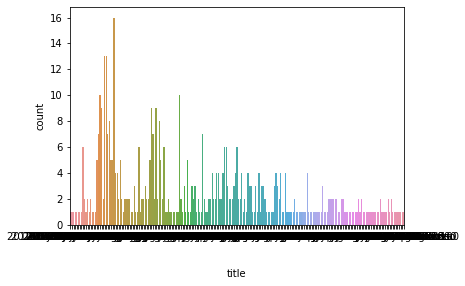

In [7]:
ax = sns.countplot(x="title", data=df_visualization_nominal)
print(df_visualization_nominal["title"].value_counts())

We have total 215 different types of car

# Making dataframe of the ordinal data

In [8]:
df_visualization_ordinal=df[["price(rs)","emi/month"]].copy()

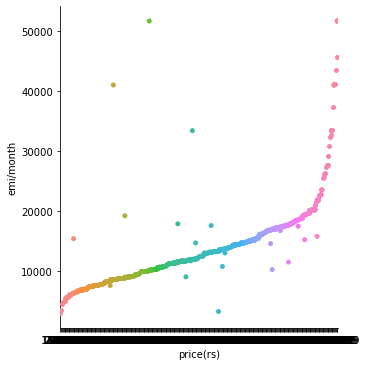

In [9]:
sns.catplot(x="price(rs)", y="emi/month", data=df)

<AxesSubplot:xlabel='emi/month', ylabel='price(rs)'>

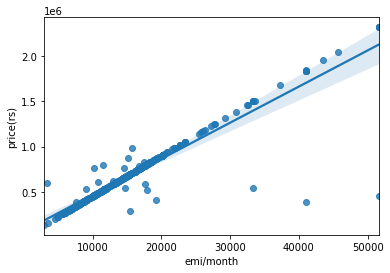

In [10]:
sns.regplot(x="emi/month",y="price(rs)",data=df)

<AxesSubplot:xlabel='location', ylabel='price(rs)'>

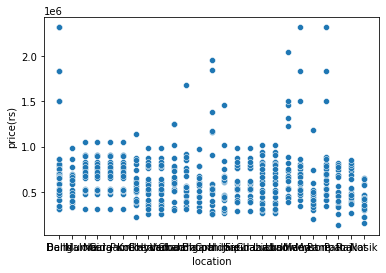

In [11]:
sns.scatterplot(x="location",y="price(rs)",data=df)

<AxesSubplot:xlabel='title', ylabel='price(rs)'>

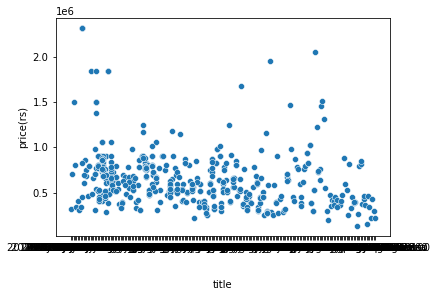

In [12]:
sns.scatterplot(x="title",y="price(rs)",data=df)

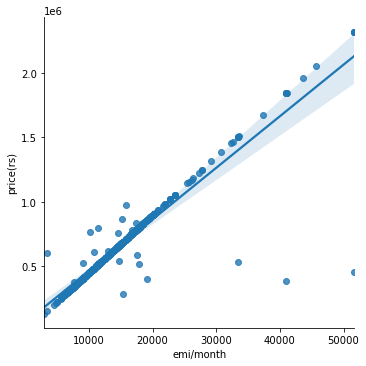

In [13]:
sns.lmplot(x='emi/month',y='price(rs)',data=df)

In [14]:
df.describe()

,price(rs),emi/month
count,5.140000e+02,514.000000
mean,6.480348e+05,14577.095331
std,3.166066e+05,7367.482775
min,1.327990e+05,2954.000000
25%,4.515740e+05,10053.250000
50%,5.966990e+05,13331.000000
75%,7.774990e+05,17391.250000
max,2.322099e+06,51654.000000


# converting object to float

In [145]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [146]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [147]:
df.dtypes

location     float64
title        float64
details      float64
price(rs)      int64
emi/month      int64
dtype: object

In [148]:
df.describe()

,location,title,details,price(rs),emi/month
count,514.000000,514.000000,514.000000,5.140000e+02,514.000000
mean,11.824903,111.986381,102.935798,6.480348e+05,14577.095331
std,7.164761,55.883283,49.568919,3.166066e+05,7367.482775
min,0.000000,0.000000,0.000000,1.327990e+05,2954.000000
25%,5.000000,65.000000,62.000000,4.515740e+05,10053.250000
50%,12.000000,114.000000,110.000000,5.966990e+05,13331.000000
75%,18.000000,158.750000,149.750000,7.774990e+05,17391.250000
max,24.000000,214.000000,180.000000,2.322099e+06,51654.000000


In [149]:
df.corr()

,location,title,details,price(rs),emi/month
location,1.000000,0.024502,-0.056955,-0.012118,-0.027274
title,0.024502,1.000000,0.058777,0.243134,0.226859
details,-0.056955,0.058777,1.000000,-0.155556,-0.158424
price(rs),-0.012118,0.243134,-0.155556,1.000000,0.930886
emi/month,-0.027274,0.226859,-0.158424,0.930886,1.000000


In [150]:
df.skew()

location     0.071861
title       -0.116609
details     -0.381487
price(rs)    2.267708
emi/month    2.286806
dtype: float64

In [21]:
import numpy as np

In [152]:
df['price(rs)']=np.sqrt(df['price(rs)'])
df['emi/month']=np.sqrt(df['emi/month'])
df.skew()

location     0.071861
title       -0.116609
details     -0.381487
price(rs)    1.150524
emi/month    0.681836
pric(rs)     1.150524
dtype: float64

In [153]:
import scipy
from scipy.stats import zscore

In [154]:
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  8,   8,   8,  17,  17,  25,  25,  25,  31,  31, 260, 260, 265,
       265, 265, 320, 375, 375, 375, 400, 400, 400, 407, 407, 446, 446,
       446, 453, 453], dtype=int64), array([3, 4, 5, 3, 5, 3, 4, 5, 3, 5, 3, 5, 3, 4, 5, 4, 3, 4, 5, 3, 4, 5,
       3, 5, 3, 4, 5, 3, 5], dtype=int64))


In [155]:
dfnew=df[(dfzscore<3).all(axis=1)]

In [156]:
print('dfnew.shape=',dfnew.shape)

dfnew.shape= (502, 6)


In [157]:
df.corr()

,location,title,details,price(rs),emi/month,pric(rs)
location,1.000000,0.024502,-0.056955,-0.009257,-0.017002,-0.009257
title,0.024502,1.000000,0.058777,0.308500,0.326104,0.308500
details,-0.056955,0.058777,1.000000,-0.153556,-0.149963,-0.153556
price(rs),-0.009257,0.308500,-0.153556,1.000000,0.940252,1.000000
emi/month,-0.017002,0.326104,-0.149963,0.940252,1.000000,0.940252
pric(rs),-0.009257,0.308500,-0.153556,1.000000,0.940252,1.000000


<AxesSubplot:>

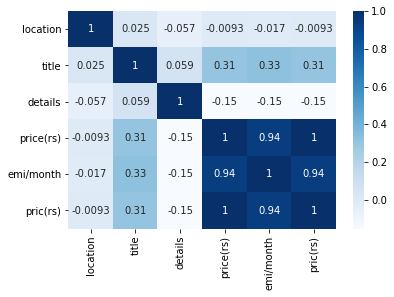

In [158]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [159]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
x=df.iloc[:,0:-1]
x

,location,title,details,price(rs),emi/month
0,5.0,17.0,141.0,560.802104,9.145605
1,5.0,48.0,56.0,841.723826,11.204412
2,5.0,139.0,134.0,1225.030204,13.516931
3,5.0,54.0,40.0,895.878898,11.559201
4,5.0,6.0,122.0,587.621477,9.361694
...,...,...,...,...,...
509,18.0,117.0,50.0,800.998752,10.930026
510,18.0,26.0,99.0,595.985738,9.428020
511,18.0,93.0,170.0,755.181435,10.612829
512,18.0,20.0,1.0,643.893625,9.799819


In [162]:
y=df.iloc[:,-1]
y

0       560.802104
1       841.723826
2      1225.030204
3       895.878898
4       587.621477
          ...     
509     800.998752
510     595.985738
511     755.181435
512     643.893625
513     463.787667
Name: pric(rs), Length: 514, dtype: float64

In [163]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [164]:
vif_calc()

   VIF Factor   features
0    3.667228   location
1    5.661499      title
2    5.286722    details
3   78.187199  price(rs)
4   99.667424  emi/month


In [165]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.95349324, -1.70138385,  0.76865271, -1.2817685 , -1.35848779],
       [-0.95349324, -1.14611584, -0.94780202,  0.31959021,  0.35229579],
       [-0.95349324,  0.48386447,  0.62729761,  2.50457969,  2.27390429],
       ...,
       [ 0.86271025, -0.34008162,  1.35426667, -0.17373373, -0.13928484],
       [ 0.86271025, -1.64764824, -2.0584492 , -0.80811581, -0.81486303],
       [ 0.86271025, -1.52226514, -0.20063938, -1.83478702, -2.04696449]])

In [166]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [167]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([8.46945821e-15, 8.88178420e-15, 6.39488462e-14, 1.75427104e+02,
       6.06181771e-14])

In [168]:
features=['location','title','details','emi/month']

In [169]:
list(zip(lr.coef_,features))

[(8.469458213394338e-15, 'location'),
 (8.881784197001252e-15, 'title'),
 (6.394884621840902e-14, 'details'),
 (175.42710449994695, 'emi/month')]

In [170]:
lr.intercept_

785.6590409790587

In [171]:
lr.score(xtrain,ytrain)

1.0

In [172]:
pred=lr.predict(xtest)
pred

array([ 952.73238635,  796.11494145,  885.32423439,  613.51365103,
        557.85213095,  531.22405819,  817.43440104,  714.70203582,
        664.90525641,  817.98471868,  643.89362475,  724.22303195,
        953.46683214,  677.93731274,  764.0674054 ,  873.78429833,
        547.4477144 ,  928.70824267,  774.20862821,  805.23226463,
        781.47232836, 1523.8434959 ,  865.67834673,  501.29731697,
        686.65784784, 1009.15756946,  883.91119463,  893.4757971 ,
        498.99799599,  795.86368179,  518.74753011,  931.98658789,
        564.09130467,  898.44254129, 1075.5459079 ,  841.72382644,
        636.15957118,  774.01485774,  659.3929026 ,  587.6214768 ,
        572.27528341,  767.13688479,  865.67834673,  782.04795249,
        867.69752794,  681.32151001,  831.38378623,  686.65784784,
       1210.70186256,  937.17607737,  602.7428971 ,  874.47069705,
        890.50491296,  804.73536023,  364.41597111,  949.3676843 ,
       1083.46619698, 1295.10578718,  619.91854304,  711.47663

In [173]:
print('Predicted values',pred)

Predicted values [ 952.73238635  796.11494145  885.32423439  613.51365103  557.85213095
  531.22405819  817.43440104  714.70203582  664.90525641  817.98471868
  643.89362475  724.22303195  953.46683214  677.93731274  764.0674054
  873.78429833  547.4477144   928.70824267  774.20862821  805.23226463
  781.47232836 1523.8434959   865.67834673  501.29731697  686.65784784
 1009.15756946  883.91119463  893.4757971   498.99799599  795.86368179
  518.74753011  931.98658789  564.09130467  898.44254129 1075.5459079
  841.72382644  636.15957118  774.01485774  659.3929026   587.6214768
  572.27528341  767.13688479  865.67834673  782.04795249  867.69752794
  681.32151001  831.38378623  686.65784784 1210.70186256  937.17607737
  602.7428971   874.47069705  890.50491296  804.73536023  364.41597111
  949.3676843  1083.46619698 1295.10578718  619.91854304  711.47663349
  626.81656009  749.33236951  643.58293949  724.91309824  906.7518955
  531.12992761  792.14834469 1106.7967293   764.85227332  755.18

In [174]:
lr.score(xtest,ytest)

1.0

In [175]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.1552049639454532e-13
Mean squared error:: 2.3577149012033123e-26
Root mean square:: 1.535485233144009e-13


In [176]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 1.0


# Separating the columns into features and target:

In [177]:
features=df.drop("price(rs)",axis=1)
target=df["price(rs)"]

In [178]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Find the beset random_State use here (currently we are moving ahead with random_state 12:¶¶

In [179]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)
lr.fit(features_train,target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

1.0


# Regularization:¶¶

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge

In [181]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [182]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.9999999990886888

In [183]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999999988559954

In [184]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [185]:
rd = Ridge(alpha=1,random_state=0)
rd.fit(features_train,target_train)
rd.score(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.9999999999999458

In [186]:
cv_score=cross_val_score(rd,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999999999990392

# Ensemble technique:¶¶¶

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [188]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.94120280209007
Cross Val Score: 98.38985672946693


In [189]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.1552049639454532e-13
Mean squared error:: 2.3577149012033123e-26
Root mean square:: 1.535485233144009e-13


# so as per observation i created a model of car prediction which can predict price of used car with r2 scoreof almost 99.92% and cv score of 98.34% , i used 3 regration technique, linear , lasso and ridge. As per my observation the model very accurate and good to go

In [190]:
import pickle
filename = 'carprediction.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:¶¶

In [193]:
loaded_model = pickle.load(open('carprediction.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result)

0.9994120280209008


In [192]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [194]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
Predicted,718.093259,728.414197,731.22186,880.05176,498.867299,884.881419,680.73897,880.078785,907.016718,1227.228956,...,724.669049,879.486498,812.528005,831.488713,785.633199,859.064156,627.68685,417.676531,884.98245,603.505802
Orginal,718.093259,728.414197,731.22186,880.05176,498.867299,884.881419,680.73897,880.078785,907.016718,1227.228956,...,724.669049,879.486498,812.528005,831.488713,785.633199,859.064156,627.68685,417.676531,884.98245,603.505802


# So The Model is ready and good to go